Error fetching price series for ALCH
Error fetching price series for BSV
Error fetching price series for CORE
Error fetching price series for CRO
Error fetching price series for ETHW
Error fetching price series for FARTCOIN
Error fetching price series for IP
Error fetching price series for MEMEFI
Error fetching price series for SPX
Error fetching price series for XCN
Error fetching price series for XDC


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future versi

Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 50.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-22.752270,1.136601,-1.196383,1.019097,31780,20.378457
2,-3.835407,1.534186,-0.390542,0.750758,30892,19.809040
3,-2.912648,1.737473,0.038993,0.656389,30868,19.793650
4,-2.024623,1.948000,0.464154,0.575917,30892,19.809040
5,-1.432520,6.426467,1.205319,0.643545,31517,20.209812


Returns Analysis


,1D,5D,10D
Ann. alpha,0.370,0.333,0.250
beta,0.006,0.016,0.035
Mean Period Wise Return Top Quantile (bps),16.704,13.688,11.478
Mean Period Wise Return Bottom Quantile (bps),-8.523,-9.299,-8.273
Mean Period Wise Spread (bps),25.227,22.607,19.110


<Figure size 640x480 with 0 Axes>

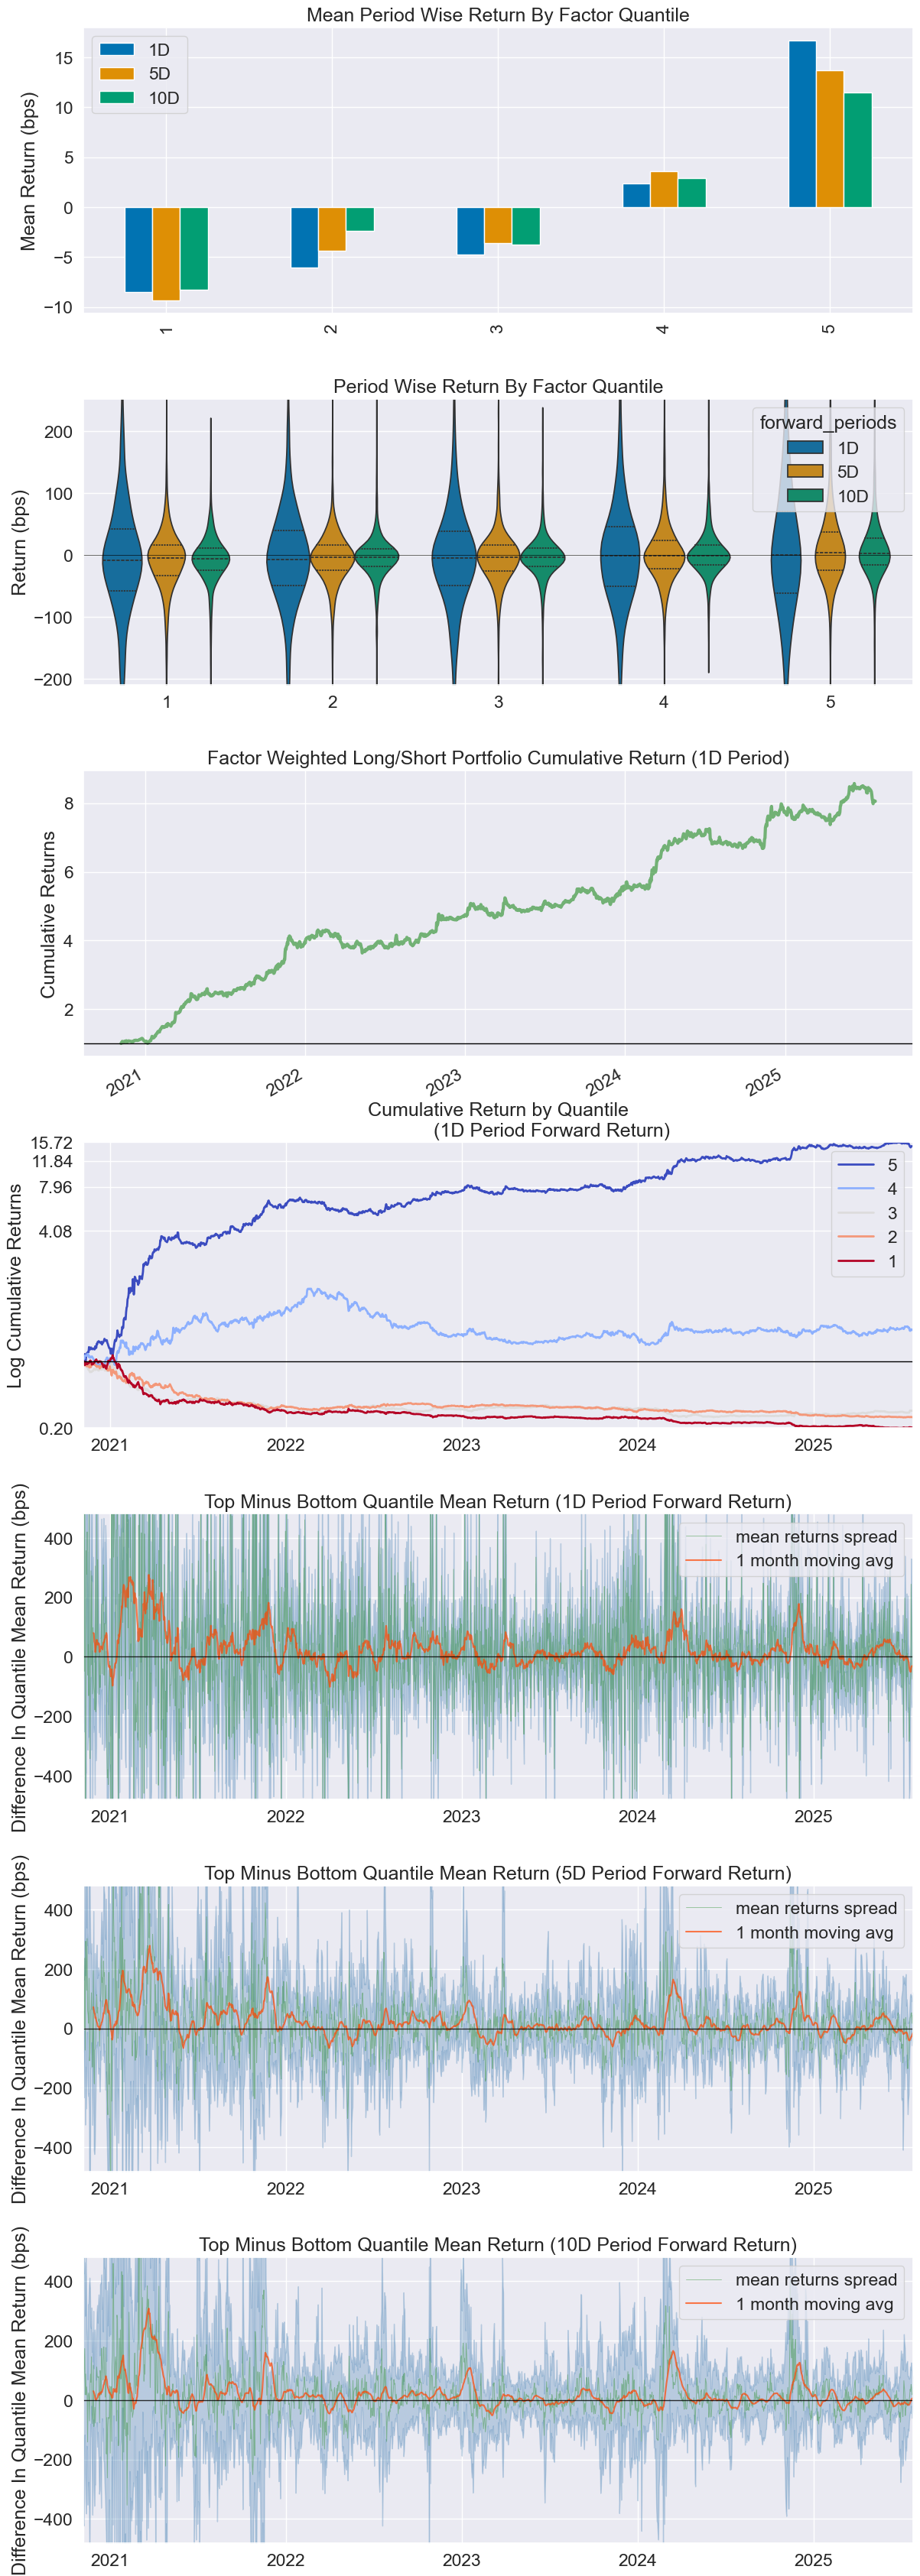

Information Analysis


,1D,5D,10D
IC Mean,-0.013,-0.003,0.000
IC Std.,0.149,0.148,0.149
Risk-Adjusted IC,-0.088,-0.021,0.002
t-stat(IC),-3.640,-0.883,0.088
p-value(IC),0.000,0.378,0.930
IC Skew,0.122,0.025,-0.060
IC Kurtosis,0.393,0.042,0.015


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


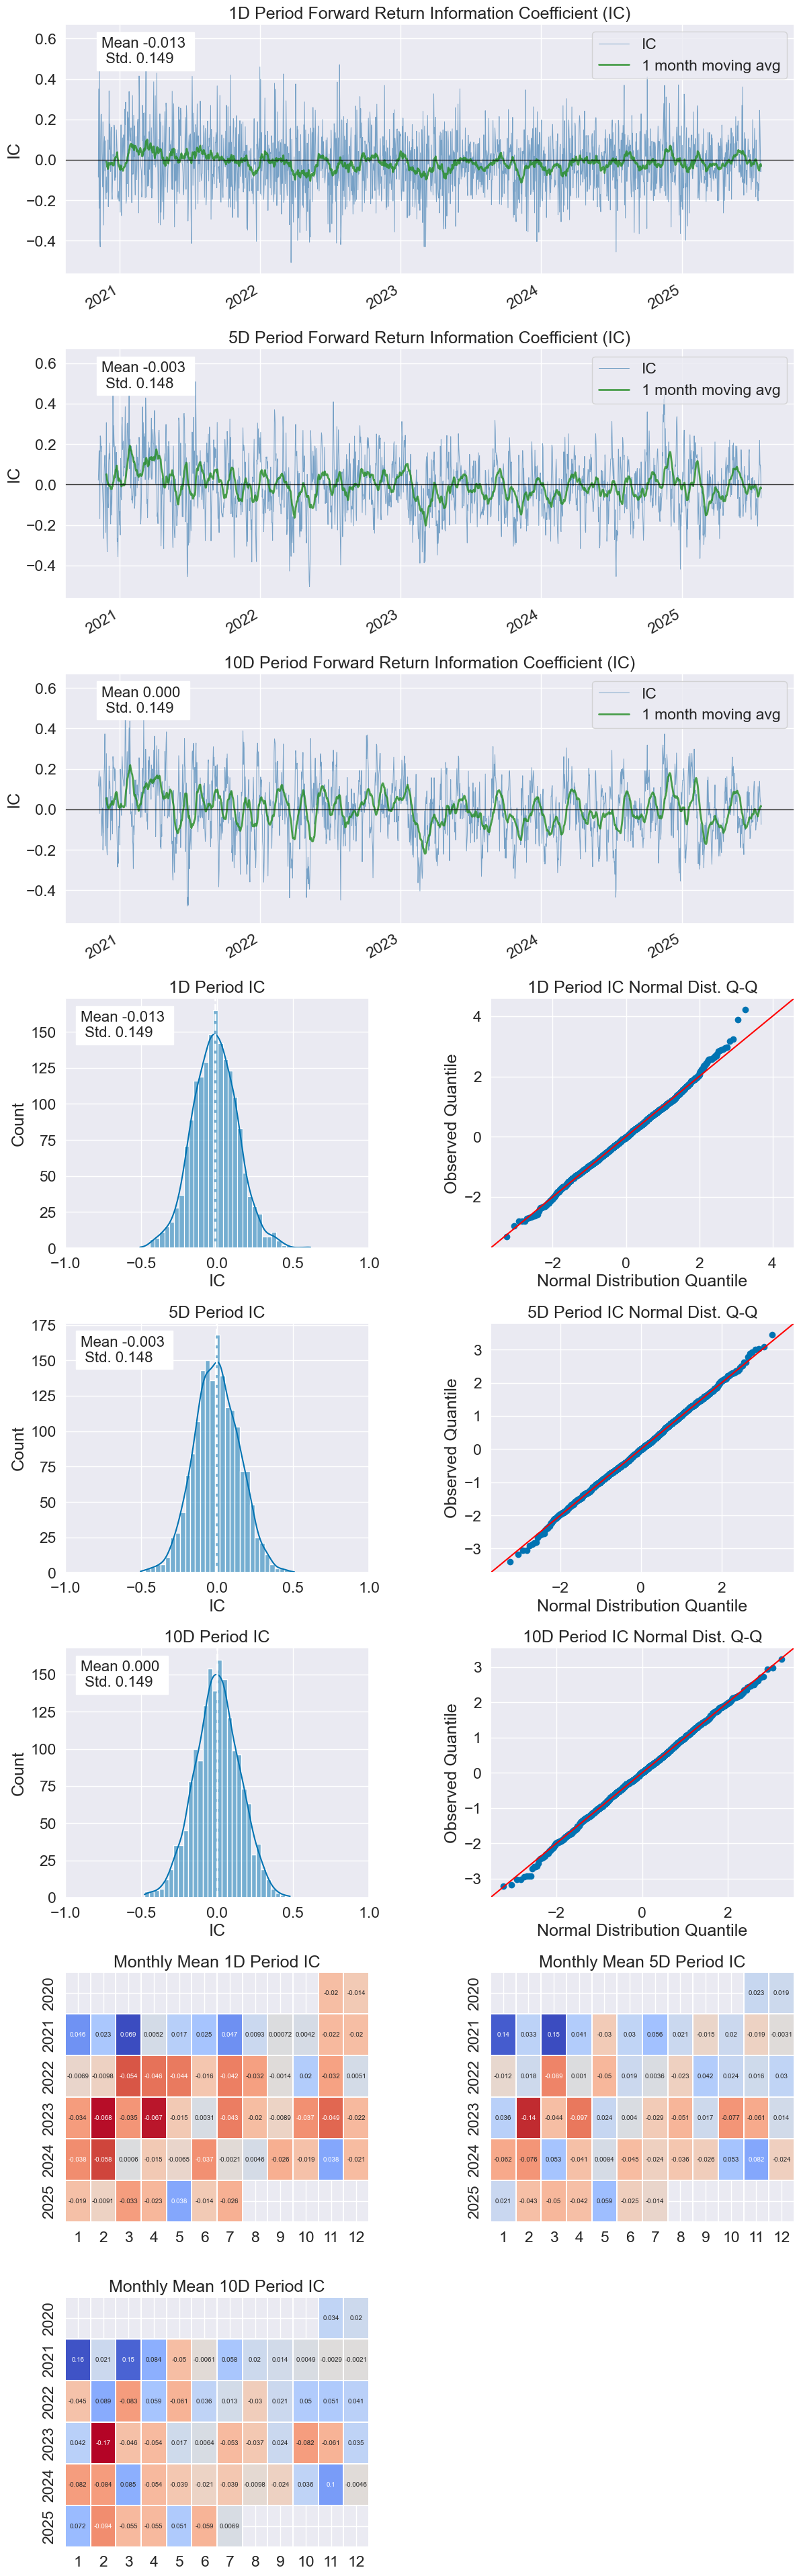

/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.347,0.528,0.604
Quantile 2 Mean Turnover,0.597,0.725,0.756
Quantile 3 Mean Turnover,0.629,0.744,0.767
Quantile 4 Mean Turnover,0.588,0.718,0.750
Quantile 5 Mean Turnover,0.352,0.550,0.633


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.749,0.482,0.352


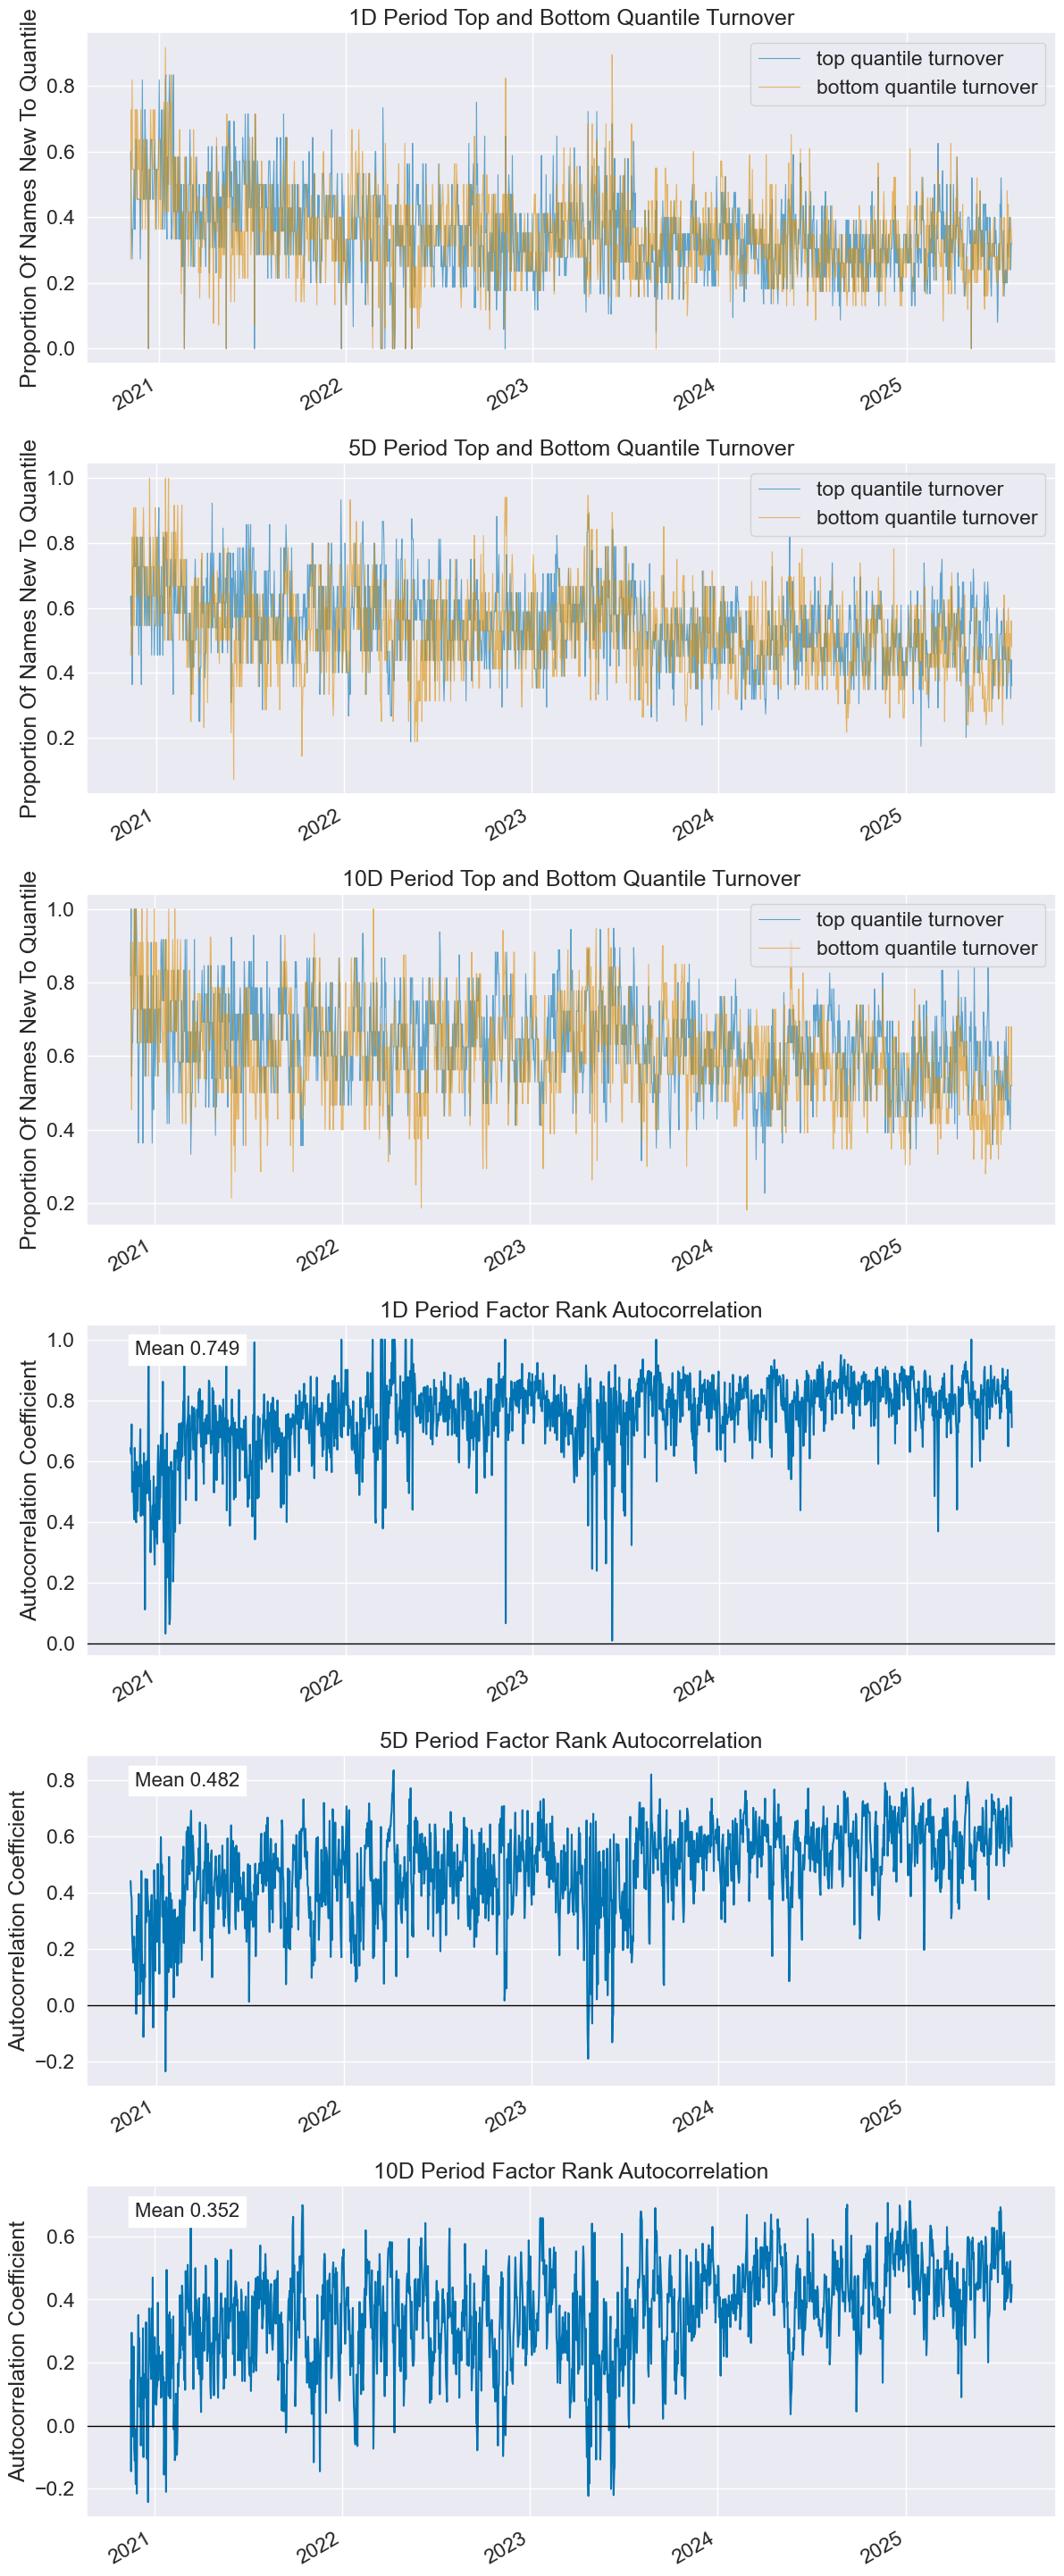

In [1]:

from analysis.utils import get_env

from analysis.alphalens import factor_analysis
from analysis.price import get_price_data
from api.portfolio.factors import get_portfolio_factors_historical
from api.portfolio.tickers import get_tickers

UNRAVEL_API_KEY = get_env("UNRAVEL_API_KEY")
portfolio = "retail_flow"

available_tickers = get_tickers(portfolio, UNRAVEL_API_KEY, universe_size="40")
historical_factors = get_portfolio_factors_historical(
    portfolio, available_tickers, UNRAVEL_API_KEY
)

underlying = get_price_data(available_tickers)

columns_intersection = historical_factors.columns.intersection(underlying.columns)
factor_analysis(historical_factors[columns_intersection], underlying)